In [1]:
import numpy as np
import os
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

# 부드러운 애니메이션을 위해
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 텐서 플로의 정보 출력 억제하기
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # GPU 장치 지정

# tf.debugging.set_log_device_placement(True)   # 이거 쓰지 마셈 ㅈㄴ 출력 더러움

if not tf.config.list_physical_devices('GPU'):
    print("감지된 GPU가 없습니다. GPU가 없으면 LSTM과 CNN이 매우 느릴 수 있습니다.")

ImportError: cannot import name 'Image' from 'PIL' (unknown location)

여기서 난 PIL을 불러온적 없음

## OpenAI 짐

In [2]:
import gym

가능한 환경 목록을 확인

In [3]:
gym.envs.registry.all()

ValuesView(├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
└──HumanoidStandup: [ v2 ]
)

Cart-Pole은 매우 간단한 환경으로 왼쪽과 오른쪽으로 움직이는 카트와 그 위에 수직으로 놓여 있는 막대로 구성.

에이전트는 카트를 왼쪽이나 오른쪽으로 움직여 막대가 바로 서 있도록 만들어야 함.

In [4]:
env = gym.make('CartPole-v1')

`reset()` 메서드를 호출해 환경을 초기화합니다. 이 메서드는 관측을 반환합니다:

In [5]:
env.seed(42)
obs = env.reset()

c:\Anaconda3\envs\tf_pt2\lib\site-packages\gym\core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


관측은 환경에 따라 다릅니다. 이 경우 4개의 실수로 구성된 1D 넘파이 배열입니다. 

카트의 수평 위치, 속도, 막대의 각도(0=수직), 각속도를 나타냅니다.

In [6]:
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

환경은 `render()` 메서드를 호출하여 시각화할 수 있습니다. 그리고 렌더링 모드(환경에 따른 렌더링 옵션)를 선택가능.

**경고**: (Cart-Pole을 포함해) 일부 환경은 화면 접근 권한이 필요합니다. `mode="rgb_array"`로 지정하더라도 별도의 윈도우를 엽니다. 일반적으로 이 윈도우를 무시할 수 있습니다. 하지만 주피터를 백엔드(headless) 서버로 실행한다면 예외가 발생합니다. 이를 피하는 한 가지 방법은 [Xvfb](http://en.wikipedia.org/wiki/Xvfb) 같은 가짜 X 서버를 설치하는 것입니다. 데비안이나 우분투에서는 다음과 같이 설치합니다:

```bash
$ apt update
$ apt install -y xvfb
```

그다음 `xvfb-run` 명령으로 주피터를 실행합니다:

```bash
$ xvfb-run -s "-screen 0 1400x900x24" jupyter notebook
```

또는 Xvfb를 감싼 [pyvirtualdisplay](https://github.com/ponty/pyvirtualdisplay) 파이썬 라이브러리를 설치할 수 있습니다:

```bash
%pip install -U pyvirtualdisplay
```

그다음 다음 코드를 실행합니다:

In [7]:
from pyvirtualdisplay import Display

try:
    import pyvirtualdisplay
    display = Display(visible=0, size=(1400, 900))
    display.start()
except ImportError:
    pass
except FileNotFoundError:
    print("FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다") # 와 씨 먼데

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다


In [8]:
'''try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass'''

'try:\n    import pyvirtualdisplay\n    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()\nexcept ImportError:\n    pass'

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [9]:
env.render()

True

이 예에서는 `mode="rgb_array"`로 지정해 환경 이미지를 넘파이 배열로 받을 것입니다:

In [10]:
img = env.render(mode="rgb_array")
img.shape   # 높이, 너비, 채널

(400, 600, 3)

In [11]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

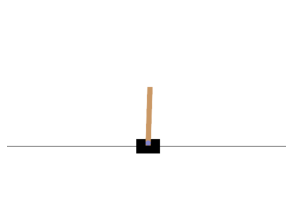

In [12]:
plot_environment(env)
plt.show()

환경과 상호작용하는 방법을 알아 보죠. 에이전트는 "행동 공간"(가능한 행동의 집합)에서 하나의 행동을 선택해야 합니다. 이 환경의 행동 공간을 다음처럼 확인해 보죠:

In [13]:
env.action_space    # Discrete(2)는 가능한 행동이 정수 0과 1이라는 것을 의미

Discrete(2)

네 단 두 개의 행동이 가능합니다: 왼쪽 또는 오른쪽으로 가속합니다.

막대가 오른쪽으로 기울어져 있기 때문에(`obs[2] > 0`), 카트를 오른쪽으로 가속해 보죠:

In [14]:
action = 1  # 오른쪽으로 가속
obs, reward, done, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

이제 카트가 오른쪽으로 움직였습니다(`obs[1] > 0`). 막대가 여전히 오른쪽으로 기울어져 있습니다(`obs[2] > 0`). 

하지만 각속도가 음수이므로(`obs[3] < 0`) 다음 스텝에서는 왼쪽으로 기울 것 같습니다.

그림 저장 cart_pole_plot


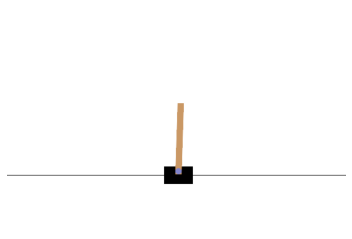

In [15]:
plot_environment(env)
save_fig("cart_pole_plot")

요청한 대로 실행되는 것 같습니다!

환경은 이전 스텝에서 얼마나 많은 보상을 받는지 에이전트에게 알려 줍니다:

In [16]:
reward

1.0

게임이 끝나면 환경은 `done=True`를 반환합니다:

In [17]:
done

False

마지막으로 `info`는 훈련이나 디버깅에 유용한 추가적인 정보를 담은 환경에 특화된 딕셔너리입니다. 예를 들어 일부 게임에서는 얼마나 많은 에이전트의 생명이 몇 개가 남아 있는지 나타낼 수 있습니다.

In [18]:
info

{}

환경이 재설정된 순간부터 종료될 때까지 스텝 시퀀스를 "에피소드"라고 합니다. 에피소드 끝에서 (즉, `step()`이 `done=True`를 반환할 때), 계속하기 전에 환경을 재설정해야 합니다.

In [19]:
if done:
    obs = env.reset()

그럼 어떻게 막대를 똑바로 유지할 수 있을까요? 이를 위해 정책을 정의해야 합니다. 에이전트가 매 스텝마다 행동을 선택하기 위해 사용할 전략입니다. 어떤 행동을 선택할지 결정하기 위해 지난 행동과 관측을 모두 사용할 수 있습니다.

* obs : 새로운 관측값, 이제 카트가 우측으로 이동(obs[1]>0). 막대가 여전히 우측으로 기울어져 있으나(obs[2]>0)
  각속도가 음수가 되었으므로 (obs[3]<0) 다음 스텝 후에는 왼쪽으로 기울 가능성 높음.

* reward : 이 환경에서는 어떤 행동을 실행해도 매 스텝마다 1.0의 보상을 받음. 그러므로 시스템의 목적은 가능한 한 
  오래 실행하는 것.

* done : 이 값이 True면 이 에피소드가 끝난 것. 막대가 너무 기울어지거나 화면 밖으로 나가거나 200스텝 이상 지날 경우
  (마지막의 경우는 에이전트가 이김). 에피소드가 끝나면 환경을 다시 사용하기 전에 꼭 초기화 해야함.

* info : 다른 환경에서는 이 딕셔너리에 디버깅이나 훈련에 유용한 추가적인 정보가 담길 수 있음.
  예로, 어떤 게임에서는 에이전트 생명이 몇 번 남았는지 알려줄 수 있음.

#### [TIP] 한 환경을 다 사용했다면 close() 메서드를 호출해 자원 반납.

#### **간단한 하드 코딩 정책**

간단한 정책을 하드 코딩해 보죠. 막대가 왼쪽으로 기울어지면 카트를 왼쪽으로 움직이고 오른쪽으로 기울어지면 반대로 움직입니다. 어떻게 작동하는지 확인해 보죠:

In [20]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [21]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.212, 9.032998173364147, 24.0, 72.0)

예상대로 이 전략은 너무 단순합니다. 최대로 막대를 유지한 스텝 횟수가 72입니다. 이 환경은 에이전트가 막대를 200 스텝 이상 유지해야 해결된 것으로 간주합니다.

하나의 에피소드를 시각화해 보죠:

In [22]:
env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

애니메이션을 출력합니다:

In [23]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [24]:
plot_animation(frames)

확실히 이 방법은 불안정해서 약간 흔들리면 막대가 너무 기울어져 게임이 끝납니다. 이 보다는 더 똑똑한 전략이 필요합니다!

## 신경망 정책

관측을 입력으로 받고 각 관측에 대해 선택할 행동의 확률을 출력하는 신경망을 만들어 보죠. 행동을 선택하기 위해 신경망은 각 행동의 확률을 추정합니다. 이 추정된 확률에 따라 랜덤하게 행동을 선택합니다. Cart-Pole 환경의 경우 두 개의 가능한 행동이 있습니다(왼쪽과 오른쪽). 따라서 하나의 출력 뉴런만 있으면 됩니다. 이 뉴런은 행동 0(왼쪽)의 확률 `p`를 출력합니다. 물론 행동 1(오른쪽)의 확률은 `1 - p`가 됩니다.

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

n_inputs = 4 # == env.observation_space.shape[0]

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

이 환경에서는 지난 행동과 관측을 무시할 수 있습니다. 각 관측이 완전한 환경의 상태를 담고 있기 때문입니다. 은닉 상태가 있다면 환경의 은닉 상태를 추정하기 위해 지난 행동과 관측을 고려해야 할 수 있습니다. 예를 들어, 이 환경이 카트의 위치만 제공하고 속도를 알려 주지 않는다면, 현재 속도를 추정하기 위해 현재 관측 뿐만 아니라 지난 관측도 고려해야 합니다. 또 다른 예는 관측에 잡음이 있는 경우입니다. 가장 가능성 있는 현재 상태를 추정하기 위해 지난 몇 개의 관측을 사용할 수 있습니다. 이 문제는 매우 간단합니다. 현재 관측에 잡음이 없고 환경의 모든 상태가 담겨 있습니다.

정책 네트워크가 출력한 확률 중에서 가장 높은 확률을 가진 행동을 선택하지 않고 랜덤한 행동을 선택하는 이유가 궁금할지 모릅니다. 이 방법은 에이전트가 새로운 행동을 탐험하는 것과 잘 동작하는 행동을 활용하는 것 사이에 밸런스를 찾도록 합니다. 비유를 들어 보죠. 한 음식점에 처음 방문했다고 가정해 보죠. 모든 음식에 대한 선호도가 동일하다면 랜덤하게 하나를 선택합니다. 이 음식이 좋다고 느낀다면 다음 번에 이 음식을 주문할 확률을 높일 수 있습니다. 하지만 이 확률을 100%로 높여서는 안됩니다. 그렇지 않으면 다른 음식을 시도해 볼 수 없습니다. 어쩌면 다른 음식이 이번에 먹은 것보다 훨씬 더 좋을 수도 있습니다.

모델을 실행하여 한 에피소드를 플레이하고 애니메이션을 위한 프레임을 반환하는 함수를 작성해 보죠:

In [26]:
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1")
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

랜덤하게 초기화된 정책 네트워크가 얼마나 잘 수행하는지 확인해 보죠:

In [27]:
frames = render_policy_net(model)
plot_animation(frames)

c:\Anaconda3\envs\tf_pt2\lib\site-packages\gym\core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


음.. 아주 나쁘군요. 이 신경망은 더 배워야 합니다. 먼저 앞에서 사용한 기본적인 정책을 학습할 수 있는지 확인해 보죠. 막대가 왼쪽으로 기울면 왼쪽으로 움직이고, 오른쪽으로 기울면 오른쪽으로 움직이도록 합니다.

같은 신경망으로 동시에 50개의 다른 환경을 플레이할 수 있습니다(이렇게 하면 각 스텝마다 다양한 훈련 배치를 얻을 수 있습니다). 그리고 5000번 반복 동안에 훈련합니다. 게임이 종료되면 환경을 재설정합니다. 사용자 정의 훈련 루프를 사용하여 모델을 훈련하기 때문에 훈련 스텝마다 환경에 앞서 예측을 쉽게 만들 수 있습니다.

In [28]:
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1") for _ in range(n_environments)]
for index, env in enumerate(envs):
    env.seed(index)
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

c:\Anaconda3\envs\tf_pt2\lib\site-packages\gym\core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


Iteration: 1008, Loss: 0.439

KeyboardInterrupt: 

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

정책을 잘 학습한 것 같군요. 이제 스스로 더 나은 정책을 학습할 수 있는지 확인해 보겠습니다.

## 행동 평가 : 신용 할당 문제 

어떤 행동이 나쁜 행동인지 알게 하는 방법. -> 행동이 일어난 후 각 단계마다 할인 계수를 적용한 보상을 모두 합해 행동 평가. 

할인 계수가 0에 가까우면 미래의 보상은 현재의 보상만큼 중요하게 취급되지 않을 것.

할인 계수가 1에 가까우면 먼 미래의 보상이 현재의 보상만큼 중요하게 고려될 것.

전형적인 값 : 0.9 ~ 0.99.

|

물론 좋은 행동 뒤에 나쁜 행동이 몇 번 뒤따르면 막대가 금방 넘어질 것이므로 좋은 행동이 낮은 대가를 받을 것.

그러나 게임을 충분히 많은 횟수만큼 반복하면 평균적으로 좋은 행동이 나쁜 행동보다 더 높은 대가를 받을 것.

-> 평균적으로 다른 가능한 행동과 비교해 각 행동이 얼마나 좋은지 혹은 나쁜지 추정해야 함 (행동 이익)

## 정책 그레이디언트 - REINFORCE 알고리즘

이 신경망을 훈련하려면 타깃 확률 `y`를 정의해야 합니다. 행동이 좋으면 해당 확률을 증가시키고 반대로 나쁘면 감소시켜야 합니다. 하지만 행동이 좋은지 나쁜지 어떻게 알까요? 대부분 행동의 효과가 지연되어 나타나기 때문에 한 에피소드에서 점수를 얻거나 잃을 때 어떤 행동이 이 결과에 기여했는지 명확하지 않다는 것이 문제입니다. 마지막 행동일까요? 아니면 마지막에서 10번째 행동일까요? 아니면 50 스텝 이전의 행동일까요? 이를 _신용 할당 문제_ 라고 부릅니다.

_정책 그레이디언트_ 알고리즘은 이 문제를 해결하기 위해 먼저 여러 개의 에피소드를 플레이하고 그다음 좋은 에피소드에 있는 행동의 가능성을 조금 더 높이고, 나쁜 에피소드에 있는 행동의 가능성을 조금 낮춥니다. 먼저 플레이해보고 다시 돌아가서 수행한 작업을 생각해 보겠습니다.

이 모델을 사용해 하나의 스텝을 플레이하는 함수를 만듭니다. 지금은 선택한 행동이 모두 좋다고 가정하고 손실과 그레이디언트를 계산합니다(그레이디언트를 저장하고 나중에 행동이 좋은지 나쁜지에 따라 수정하겠습니다):

In [ ]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, grads

함수 설명 :

* GradientTape 블록(12장 참조) 안에서 하나의 관측과 함께 먼저 모델을 호출(모델은 배치를 기대하므로 하나의 샘플이 들어있는 배치가 되도록 관측의 크기를 바꿈). 이 모델은 왼쪽으로 이동할 확률을 출력.

* 그다음 0~1 사이에서 랜덤한 실수를 샘플링. 이 값이 left_proba보다 큰지 확인. action은 left_proba 확률로 False가 되고 1-left_proba 확률로 True가 될 것. 이 boolean 값을 숫자로 변환하면 액션은 출력된 확률에 맞게 0(왼쪽)또는 1(오른쪽)이 됨.

* 이제 왼쪽으로 이동할 타깃 확률을 정의. 이 값은 1 빼기 (실수로 변환된) 행동. 행동이 0(왼쪽)이면 이동할 타깃 확률은 1이 될 것. 행동이 1(오른쪽)이면 타깃 확률이 0이 될 것.

* 그런 다음 주어진 손실 함수를 사용해 손실을 계산하고 테이프를 사용해 모델의 훈련가능한 변수에 대한 손실의 그레디언트를 계산. 이 그레디언트도 나중에 적용하기 전에 이 행동이 좋은지 나쁜지에 따라 조정될 것.

* 마지막으로 선택한 행동을 플레이하고 새로운 관측, 보상, 에피소드 종료 여부, 계산한 그레디언트를 반환함.

`left_proba`가 높으면 `action`이 `False`가 될 가능성이 높습니다(0~1 사이에서 균등 분포로 난수를 샘플링하면 `left_proba`보다 높지 않을 가능성이 높기 때문에). 그리고 `False`를 숫자로 바꾸면 0이므로 `y_target`은 1 - 0 = 1입니다. 다른 말로 하면 타깃을 1로 지정하는 것은 왼쪽일 확률을 100%로 가정한다는 의미입니다(따라서 올바른 행동을 선택했습니다).

이제 `play_one_step()` 함수를 사용해 여러 개의 에피소드를 플레이하고 에피소드와 스텝마다 모든 보상과 그레이디언트를 반환하는 또 다른 함수를 만들어 보죠:

In [ ]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

이 코드는 보상 리스트의 리스트(에피소드마다 보상 리스트 하나. 이 리스트는 스텝마다 보상하나를 포함)와
그레디언트 리스트의 리스트(에피소드마다 그레디언트 리스트 하나. 이 리스트는 스텝마다 그레디언트 튜플을 하나 포함하고 각 튜플을 하나 포함하고 각 튜플은 훈련가능한 변수마다 그레디언트 텐서 하나를 포함)를 반환.

이 알고리즘은 play_multiple_episodes()를 사용해 여러번 게임을 플레이함(ex 10번).

그다음 처음부터 모든 보상을 살펴서 각 보상을 할인하고 정규화함.
이렇게 하기 위해 함수 몇 개가 더 필요. 첫번재 함수는 각 스텝에서 할인된 미래 보상의 합을 계산.
두번째 함수는 여러 에피소드에 걸쳐 계산된 할인된 이 모든 보상(대가)에서 평균을 빼고 표준편차를 나누어 정규화.

정책 그레이디언트 알고리즘은 모델을 사용해 여러 번 에피소드를 플레이합니다(예를 들어 10번). 그다음 모든 보상을 할인하고 정규화합니다. 이를 위한 함수를 만들어 보죠. 첫 번째 함수는 할인된 보상을 계산합니다. 두 번째 함수는 여러 에피소드에 걸쳐 할인된 보상을 정규화합니다.

In [ ]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

첫번째 에피소드는 두번째에 비해 너무 나쁘므로 정규화된 이익이 모두 음수.

첫번째 에피소드의 행동은 모두 나쁜 것으로 간주됨. 반면 두번째 에피소드의 행동은 모두 좋은 것으로 간주.

3개의 행동을 수행하고 각 행동의 보상이 10, 0, -50이라고 가정해 보죠. 80%의 할인 계수를 사용하면 세 번째 행동은 -50(마지막 보상의 100%)를 받지만 두 번째 행동은 -40(마지막 보상의 80%)만 받습니다. 그리고 첫 번째 행동은 -40의 80%(-32)에 첫 번째 보상(+10)의 100%를 받습니다. 따라서 할인된 보상의 합은 -22가 됩니다:

In [ ]:
discount_rewards([10, 0, -50], discount_rate=0.8)

전체 에피소드에 대해 모든 할인된 보상을 정규화하기 위해 전체 할인된 보상의 평균과 표준 편차를 계산합니다. 그리고 할인된 보상에서 평균을 빼고 표준 편차를 나눕니다:

In [ ]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

In [ ]:
n_iterations = 150            # 훈련 반복 횟수
n_episodes_per_update = 10    # 에피소드 수
n_max_steps = 200             # 스텝 최대
discount_rate = 0.95          # 할인 계수

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.binary_crossentropy

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[4]),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [ ]:
env = gym.make("CartPole-v1")
env.seed(42);

for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))                     # Not shown in the book
    print("\rIteration: {}, mean rewards: {:.1f}".format(          # Not shown
        iteration, total_rewards / n_episodes_per_update), end="") # Not shown
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

코드 :

* 각 훈련반복에서 play_multiple_episodes()를 호출. 이 함수는 게임을 10번 플레이하고 각 에피소드와 스텝에 대한 모든 보상과 그레이디언트를 반환함.

* 그다음 discount_and_normalize_rewards()를 호출해 각 행동의 정규화된 이익(final_reward)을 계산.
이 값은 각 행동이 실제로 얼마나 좋은지 나쁜지 알려줌.

* 그다음 각 훈련가능한 변수를 순회하면서 모든 에피소드와 모든 스텝에 대한 각 변수의 그레디언트를 final_reward로 가중치를 두어 평균함.

* 마지막으로 이 평균 그레디언트를 옵티마이저에 적용. 모델의 훈련 가능한 변수가 변경되고 아마 정책은 좀 더 나아질 것.

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

더 좋은 알고리즘 : 액터-크리틱

## 마르코프 결정 과정

#### 마르코프 연쇄 - 메모리가 없는 확률 과정

이 과정은 정해진 개수의 상태를 가지고 있으며, 각 스텝마다 한 상태에서 다른 상태로 랜덤하게 전이됨.

상태 $s$에서 상태 $s'$으로 전이하기 위한 확룔은 고정되어 있으며, (시스템에 메모리가 없으므로) 과서 상태에는

상관없이 ($s, s'$)쌍에만 의존.

**벨만 최적 알고리즘**

**가치 반복 알고리즘**

**Q-가치 반복 알고리즘**

In [ ]:
np.random.seed(42)

transition_probabilities = [ # shape=[s, s']
        [0.7, 0.2, 0.0, 0.1],  # from s0 to s0, s1, s2, s3
        [0.0, 0.0, 0.9, 0.1],  # from s1 to ...
        [0.0, 1.0, 0.0, 0.0],  # from s2 to ...
        [0.0, 0.0, 0.0, 1.0]]  # from s3 to ...

n_max_steps = 50

def print_sequence():
    current_state = 0
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
    else:
        print("...", end="")
    print()

for _ in range(10):
    print_sequence()

전이 확률, 보상, 가능한 행동을 정의해 보죠. 예를 들어, 상태 s0에서 행동 a0가 선택되면 0.7의 확률로 상태 s0로 가고 +10 보상을 받습니다. 그리고 0.3의 확률로 상태 s1으로 가고 보상이 없습니다. 상태 s2로는 이동하지 않습니다(따라서 전이 확률은 `[0.7, 0.3, 0.0]`이고 보상은 `[+10, 0, 0]`입니다):

In [ ]:
transition_probabilities = [ # shape=[s, a, s']
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None]]
rewards = [ # shape=[s, a, s']
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]
possible_actions = [[0, 1, 2], [0, 2], [1]]

예로, 행동 $\alpha_1$ 을 플레이한 후 $s_2$ 에서 $s_0$ 으로 전이할 확률을 알기 위해선 

transition_probabilities[2][1][0]을 참조(0.8). 비슷하게 이에 해당하는 보상을 얻으려면

rewards[2][1][0]을 참조(+40). $s_2$ 에서 가능한 행동의 리스트를 얻으려면 possible_actions[2]를 참조

(이 경우 행동 $a_1$ 만 가능). 그다음 모든 Q-가중치를 0으로 초기화해야 함

(불가능한 행동은 제외. 이 행동의 Q-가치는 $-\infty$ 로 설정).

## Q-가치 반복

In [ ]:
Q_values = np.full((3, 3), -np.inf) # 불가능한 행동은 -np.inf
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # 모든 가능한 행동에 대해

In [ ]:
gamma = 0.90  # 할인 계수

history1 = [] # 책에는 없음
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev) # 책에는 없음
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

history1 = np.array(history1) # 책에는 없음

In [ ]:
Q_values

예를 들어, 에이전트가 상태 $s_0$ 에 있고 행동 $\alpha_1$ 을 선택했을 때 할인된 미래 보상의 기대 합은 약 17

In [ ]:
np.argmax(Q_values, axis=1)

할인 계수 0.9를 사용했을 때 이 MDP의 최적 정책은 상태 s0에서 행동 a0를 선택하고, 상태 s1에서 행동 a0를 선택하고, 마지막으로 상태 s2에서 행동 a1(선택 가능한 유일한 행동)을 선택하는 것입니다.

할인 계수 0.95로 시도해 보죠:

In [ ]:
Q_values = np.full((3, 3), -np.inf) # 불가능한 행동에 대해서는 -np.inf
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # 모든 가능한 행동에 대해서

In [ ]:
gamma = 0.95  # 할인 계수

for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

In [ ]:
Q_values

In [ ]:
np.argmax(Q_values, axis=1)

이제 정책이 바뀌었습니다! 상태 s1에서 불 속으로 들어가는 것을 선택합니다(행동 a2). 할인 계수가 크기 때문에 에이전트가 미래에 더 많은 가치를 두기 때문에 미래 보상을 얻기 위해 당장의 불이익을 감내합니다.

## 시간차 학습 (TD 학습) - 수정 필요

TD 학습 알고리즘

## Q-러닝

**Q-러닝 알고리즘**

Q-러닝은 에이전트의 (예를 들면, 랜덤한) 플레이를 보고 점진적으로 Q-가치 추정을 향상합니다. 정확한 (또는 충분히 가까운) Q-가치 추정을 얻으면 최적의 정책은 가장 높은 Q-가치를 가진 행동을 선택하는 것입니다(즉, 그리디 정책).

환경을 돌아다니는 에이전트를 시뮬레이션해야 합니다. 따라서 행동을 선택하고 새로운 상태와 보상을 받는 함수를 정의해 보죠:

In [ ]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

또한 탐험 정책도 필요합니다. 가능한 모든 상태를 여러번 방문한다면 어떤 정책도 가능합니다. 상태 공간이 매우 작기 때문에 랜덤한 정책을 사용하겠습니다:

In [ ]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

이제 앞에서와 같이 Q-가치를 초기화하고 Q-러닝 알고리즘을 실행해 보죠:

In [ ]:
np.random.seed(42)

Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

alpha0 = 0.05 # 초기 학습률
decay = 0.005 # 학습률 감쇄
gamma = 0.90 # 할인 계수
state = 0 # 초기 상태
history2 = [] # 책에는 없음

for iteration in range(10000):
    history2.append(Q_values.copy()) # 책에는 없음
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # 다음 스텝의 그리디 정책
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2) # 책에는 없음

In [ ]:
Q_values

In [ ]:
np.argmax(Q_values, axis=1) # 각 상태에 대한 최적의 행동

In [ ]:
true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

save_fig("q_value_plot")

훈련된 정책을 반드시 실행에 사용하지 않기 때문에 Q-러닝 알고리즘을 오프-폴리시 알고리짐이라 함.

이전 코드 예제에서 실행된 정책(탐험 정책)은 완전히 랜덤한 정책.

훈련된 정책은 항상 가장 높은 Q-가치를 가진 행동을 선택하는 것. 반대로 정책 그레디언트 알고리즘은 온-폴리시 알고리즘.

#### 탐험 정책

Q-러닝은 탐험 정책이 MDP를 충분히 탐험해야 작동. 완전한 랜덤 정책이 결국에는 모든 상태와 전이를 

여러 번 경험한다고 보장, 이렇게 하려면 극단적으로 오랜 시간이 걸릴 수 있음. 

더 나은 방법으로 $\epsilon$ -그리디 정책이 있음.

장점 : (완전한 랜덤 정책에 비해) Q-가치 추정이 점점 더 향상되기 때문에 환경에서 관심있는 부분을 살피는데 

  점점 더 향상되기 때문에 환경에서 관심있는 부분을 살피는 데 점점 더 많은 시간을 사용함.

다른 방법으로는 탐험의 가능성에 의존하는 대신 이전에 많이 시도하지 않았던 행동을 시도하도록 탐험정책을

강조하는 방법이 있음. Q-가치 추정에 보너스를 추가하는 방식으로 구현.

**탐험 함수를 사용한 Q-러닝**

#### 근사 Q-러닝과 심층 Q-러닝

Q-러닝의 주요 문제는 많은 상태와 행동을 가진 대규모(또는 중간규모)의 MDP에 적용하기 어려움.

ex) 미스 팩맨을 플레이하는 에이전트를 훈련한다고 가정

미스 팩맨이 먹을 수 있는 먹이가 150개가 나타날 수도 있고, (이미 먹었다면) 없을수도 있음.
그러므로 가능한 상태의 개수는 $2^{150} \approx 10^{45}$ 보다 큼.미스 팩맨과 유령이 있을 수 있는 모든 위치를 더하면
가능한 상태의 수는 지구에 있는 원자 수보다도 큼. 그러므로 모든 Q-가치에 대한 추정값 기록할 수 있는 방법 X

|

근사 Q-러닝 : 어떤 상태 행동 $(s, a)$ 쌍의 Q-가치를 근사하는 함수 $\mathcal{Q}_{\theta}(s, a)$ 를 (파라미터 벡터 $\theta$ 로 주어진) 적절한 개수의 파라미터를 사용하여 찾는 것. 

심층 Q-러닝 : 근사 Q-러닝을 위해 DQN을 사용하는 것.

심층 Q-네트워크(DQN) : Q-가치를 추정하기 위해 사용하는 DNN

**타킷 Q-가치**

## 심층 Q-러닝 구현하기

맨 먼저 필요한 것은 DQN. 이론적으로 상태-행동 쌍을 입력으로 받고 근사 Q-가치를 출력하는 신경망이 필요함.

하지만 실전에선 상태를 받고 가능한 모든 행동에 대한 근사 Q-가치를 각각 출력하는 것이 훨씬 효율적.

CartPole 환경에는 복잡한 신경망 필요없음.

DQN을 만들어 보죠. 상태가 주어지면 가능한 모든 행동에 대해서 행동을 플레이한 후 (하지만 결과를 보기 전에) 기대할 수 있는 할인된 미래 보상의 합을 추정합니다:

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

env = gym.make("CartPole-v1")
input_shape = [4] # == env.observation_space.shape
n_outputs = 2 # == env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

이 DQN을 사용해 행동을 선택하려면 가장 큰 예측 Q-가치를 가진 행동을 선택하면 됩니다. 하지만 에이전트가 환경을 탐험하려면 `epsilon` 확률로 랜덤한 행동을 선택합니다.

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

재생 메모리(재생 버퍼)도 필요합니다. 여기에는 에이전트의 경험이 담겨 있습니다. 형식은 `(obs, action, reward, next_obs, done)`와 같습니다. `deque` 클래스를 사용할 수 있습니다(더 강력한 경험 재생의 구현을 위해 딥마인드의 [Reverb 라이브러리](https://github.com/deepmind/reverb)를 참고하세요):

In [ ]:
from collections import deque

replay_memory = deque(maxlen=2000)

그리고 재생 메모리에서 경험을 샘플링하는 함수를 만듭니다. 이 함수는 5개의 넘파이 배열 `[states, actions, rewards, next_obs, dones]`을 반환합니다.

In [ ]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

$\epsilon$ -그리디 정책을 사용해 하나의 스텝을 플레이하고 반환된 경험을 재생 버퍼에 저장하는 함수

이제 DQN을 사용해 한 스텝을 플레이하는 함수를 만들고 경험을 재생 메모리에 기록할 수 있습니다:

In [ ]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_memory.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

마지막으로 재생 메모리에서 약간의 경험을 샘플링하고 훈련 스텝을 수행하여 DQN을 훈련하는 함수를 만들어 보죠:

**노트**:
* 2판의 처음 세 번의 릴리스에는 `target_Q_values`를 열 벡터로 변환하는 `reshape()` 연산이 빠져있습니다(`loss_fn()`에서 필요합니다).
* 이 책은 학습률 1e-3을 사용하지만 아래 코드에서는 훈련이 크게 좋아지기 때문에 1e-2를 사용합니다. 또한 여러 가지 DQN의 학습률을 튜닝했습니다.

In [ ]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    max_next_Q_values = np.max(next_Q_values, axis=1)
    target_Q_values = (rewards +
                       (1 - dones) * discount_rate * max_next_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

코드 :

* 먼저 하이퍼파라미터 몇 개를 정의하고 옵티마이저와 손실 함수를 만듦.

* 그다음 training_step()를 만듦. 이 함수는 경험 배치를 샘플링한 다음 DQN을 사용해 각 경험의 다음 상태에서
  가능한 모든 행동에 대한 Q-가치를 예측. 에이전트가 최적으로 플레이한다고 가정하므로 다음 상태에 대한
  최대 Q-가치만 저장. 그다음 "타킷 Q-가치"를 사용해 각 경험의 상태-행동 쌍에 대한 "타킷 Q-가치"를 계산

* DQN이 경험한 각 상태-행동 쌍의 Q-가치를 계산하길 원함. 하지만 이 DQN은 에이전트가 실제로 선택한
  행동뿐만 아니라 다른 가능한 행동에 대한 Q-가치도 출력할 것. 따라서 필요하지 않은 모든 Q-가치를 
  마스크 처리해야함. tf.one_hot()는 행동 인덱스의 배열을 마스크로 쉽게 변환.

  예를 들어, 처음 3개의 경험이 행동 1, 1, 0을 각각 담고 있다면 마스크는 [[0,1], [0,1], [1,0], ...]와
  같을 것. 이 마스크를 DQN의 출력과 곱해 원치 않은 Q-가치를 0으로 만들 수 있음. 그다음 0을 없애기 위해
  열(axis=1) 방향으로 덧셈하여 경험된 상태-행동 쌍의 Q-가치만 남김. 결국 배치에 있는 각 경험에 대해
  예측된 Q-가치 하나를 담은 텐서인 Q_values를 얻음.

* 그다음 손실 계산. 경험된 상태-행동 쌍에 대한 타깃과 예측된 Q-가치 사이의 평균 제곱 오차.

* 마지막으로 모델의 훈련 가능한 변수에 관한 손실을 최소화하기 위해 경사 하강법을 수행.

이제 모델을 훈련해 보죠!

In [ ]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = [] 
best_score = 0

In [ ]:
for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step) # Not shown in the book
    if step >= best_score: # Not shown
        best_weights = model.get_weights() # Not shown
        best_score = step # Not shown
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="") # Not shown
    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

최대 스텝 200번으로 이뤄진 에피소드 600개를 실행. 각 스텝에서 먼저 $\epsilon$-그리디 정책에 대한 

epsilon 값을 계산. 이 값은 500 에피소드 직전까지 1~0.01로 선형적으로 줄어듦.

그다음 play_one_step() 호출. 이 함수는 $\epsilon$-그리디 정책을 사용해 행동을 선택해 실행하고

그 경험을 재생 버퍼(재생 메모리)에 기록. 에피소드 종료시 반복 끝냄.

마지막 50번째 에피소드 이후에는 training_step()를 호출해 재생버퍼에서 샘플링한 배치로 모델을 훈련.

훈련없이 에피소드를 50번 플레이하는 이유는 재생버퍼가 채워질 시간을 주기 위해서

(충분한 시간을 주지 않으면 재생 버퍼에 다양성이 부족해짐.) -> DQN 알고리즘 구현

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("dqn_rewards_plot")
plt.show()

In [ ]:
env.seed(42)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)

## 심층 Q-러닝의 변종

### 고정 Q-가치 타깃

기본 심층 Q-러닝 알고리즘에서 모델은 예측을 만들고 타깃을 설정하는데 모두 사용됨.

-> 자신의 꼬리를 쫓는 강아지에 비유할 만한 상황

이런 피드백 순환 과정 => 네트워크 불안정(발산, 진동, 동결)

|

이 문제해결을 위해 2개 DQN 사용.

1번째는 각 스텝에서 학습하고 에이전트를 움직이는데 사용하는 온라인 모델

2번째는 타깃을 정의하기 위해서만 사용하는 타킷모델(단순히 온라인 모델의 복사본)

### 더블 DQN

타깃 네트워크가 Q-가치를 과대평가하기 쉽다는 관측을 기반.



In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=[4]),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

target = keras.models.clone_model(model)    # 온라인 모델의 복사본
target.set_weights(model.get_weights())     

In [ ]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=6e-3)
loss_fn = keras.losses.Huber()

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    best_next_actions = np.argmax(next_Q_values, axis=1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states) * next_mask).sum(axis=1)
    target_Q_values = (rewards + 
                       (1 - dones) * discount_rate * next_best_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
replay_memory = deque(maxlen=2000)

In [ ]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = []
best_score = 0

for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="")
    if episode >= 50:
        training_step(batch_size)
        if episode % 50 == 0:       # 훈련 루프에서 일정 간격으로 온라인 모델 가중치를 타킷 모델로 복사
            target.set_weights(model.get_weights())
    # Alternatively, you can do soft updates at each step:
    #if episode >= 50:
        #target_weights = target.get_weights()
        #online_weights = model.get_weights()
        #for index in range(len(target_weights)):
        #    target_weights[index] = 0.99 * target_weights[index] + 0.01 * online_weights[index]
        #target.set_weights(target_weights)

model.set_weights(best_weights)

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("double_dqn_rewards_plot")
plt.show()

In [ ]:
env.seed(43)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
   
plot_animation(frames)

### 우선 순위 기반 경험 재생

중요도 샘플링(IS) 또는 우선 순위 기반 경험 재생(PER) -> 학습진행을 빠르게 만든 행동을 '중요한' 것으로 간주.

how to ? :

한가지 방법은 TD 오차 $\delta=r+\gamma \centerdot  V(s')-V(s) $ 의 크기를 재는 것.

경험이 재생 버퍼에 기록될 때 적어도 한 번 샘플링되기 위해 매우 높은 우선 순위 값으로 설정.

하지만 샘플링 된 후(샘플링 될 때마다) TD오차 $\delta$ 를 계산하여 경험 우선 순위를 $p=\left| \delta \right|$ 로 설정.

우선 순위 p의 경험을 샘플링할 확률 P는 $p^{\zeta}$ 에 비례. 여기서 $\zeta$ 는 우선순위 샘플링을 얼마나 탐욕적으로

할 것인지 제어하는 하이퍼파라미터.

여기서 짚고 넘어가야 할 부분이 있는데, 샘플이 중요한 경험에 편향되 있으므로 훈련하는 동안 중요도에 따라

경험의 가중치를 낮춰서 이 편향을 보상해주어야 함. 자세히 설명하면 중요한 경험의 가중치를 낮춰 

이 편향을 보상해줘야함.

자세히 말하자면 중요한 경험이 더 자주 샘플링되기를 원하지만 이는 훈련과정에서 이 샘플에 낮은 가중치를 주어야 한다는 것.

이렇게 하기 위해 각 경험의 훈련 가중치 $w=(n P)^{-\beta} $ 를 정의.

|

$n$ = 재생 버퍼에 있는 경험의 개수

$\beta$ = 중요도 샘플링 편향을 얼마나 보상하지 조정하는 하이퍼파라미터

### 듀얼링 DQN

이 알고리즘의 작동 방식을 이해하려면 먼저 상태-행동 쌍 $(s, a)$ 의 $Q$-가치가 $Q(s, a)=V(s)+A(s, a)$ 처럼

표현될 수 있다는 것을 알아야 함. 여기서 $V(s)$ 는 상태 $s$ 의 가치이고 $A(s, a)$ 는 상태 $s$ 에서

다른 모든 가능한 행동과 비교해 행동 $a^*$ 의 Q-가치와 같음.

따라서 $V(s)=Q(s, a^*)$. 이는 $A(s, a^*)=0$ 를 의미. 듀얼링 DQN에서는 모델이 상태의 가치와 가능한

각 행동의 이익을 모두 추정. 최선의 행동은 이익이 0이기 때문에 모델이 예측한 모든 이익에서

모든 최대 이익을 뺌.

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
input_states = keras.layers.Input(shape=[4])
hidden1 = keras.layers.Dense(32, activation="elu")(input_states)
hidden2 = keras.layers.Dense(32, activation="elu")(hidden1)
state_values = keras.layers.Dense(1)(hidden2)
raw_advantages = keras.layers.Dense(n_outputs)(hidden2)
advantages = raw_advantages - K.max(raw_advantages, axis=1, keepdims=True)
Q_values = state_values + advantages
model = keras.models.Model(inputs=[input_states], outputs=[Q_values])

target = keras.models.clone_model(model)
target.set_weights(model.get_weights())

In [ ]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=7.5e-3)
loss_fn = keras.losses.Huber()

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    best_next_actions = np.argmax(next_Q_values, axis=1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states) * next_mask).sum(axis=1)
    target_Q_values = (rewards + 
                       (1 - dones) * discount_rate * next_best_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
replay_memory = deque(maxlen=2000)

In [ ]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = []
best_score = 0

for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="")
    if episode >= 50:
        training_step(batch_size)
        if episode % 50 == 0:
            target.set_weights(model.get_weights())

model.set_weights(best_weights)

In [ ]:
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Sum of rewards")
plt.show()

In [ ]:
env.seed(42)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)

매우 안정적인 에이전트같습니다!

In [ ]:
env.close()